In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

2023-06-20 12:21:02.591419: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 12:21:02.636356: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 12:21:02.637302: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 12:21:03.493411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.__version__

'2.12.0'

# MNIST Data

## Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

## Viz Data

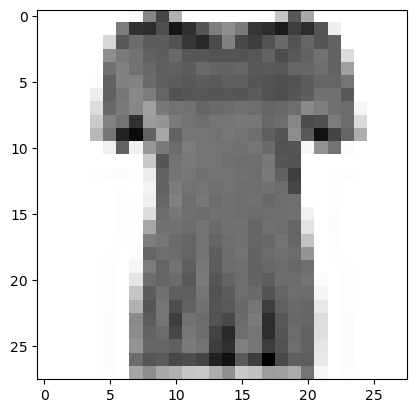

In [6]:
plt.imshow(x_train[10], cmap='Greys')

In [7]:
np.set_printoptions(linewidth=320)
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,   0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187, 149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221, 197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187, 190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168, 173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180, 184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,   0,   0],
       [  0,   0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 186, 187, 186, 187, 182, 191, 194, 188

## Normalize Data

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

## Create Model

### Initialize Model

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile Model

In [12]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train model

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5030 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3783 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2951 - accuracy: 0.8909


### Evaluate Model

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3434 - accuracy: 0.8791


[0.34341961145401, 0.8791000247001648]

In [32]:
y_preds_test = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


Actual Label 9
Predicted Label 9


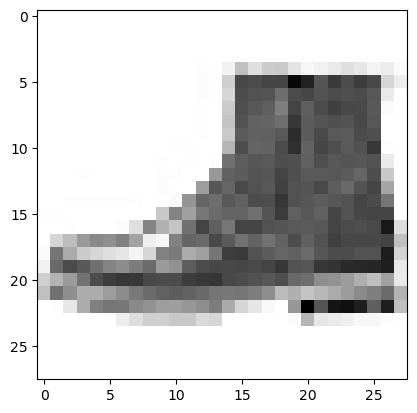

In [45]:
index = 1355
print('Actual Label', y_test[index])
print('Predicted Label', y_preds_test[index].argmax())
plt.imshow(x_test[index], cmap='Greys')

### Callbacks

In [54]:
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if(logs.get('loss') < 0.25):
            print("\nLoss is lower than 0.25 so cancelling training!")
            self.model.stop_training = True

customCallback = CustomCallback()

In [55]:
model_auto_stop = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [56]:
model_auto_stop.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [57]:
model_auto_stop.fit(
    x_train,
    y_train,
    epochs=10,
    callbacks=[customCallback]
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4933 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3701 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3323 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3081 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2916 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2774 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2635 - accuracy: 0.9032
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2550 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2446 - accuracy: 0.9083
Loss is lower than 0.25 so cancelling training!
1875/1875 [===========================

## Sample Snippet

In [15]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2
